<a href="https://colab.research.google.com/github/FatihUlumuddin/HistogramEqualization/blob/main/Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

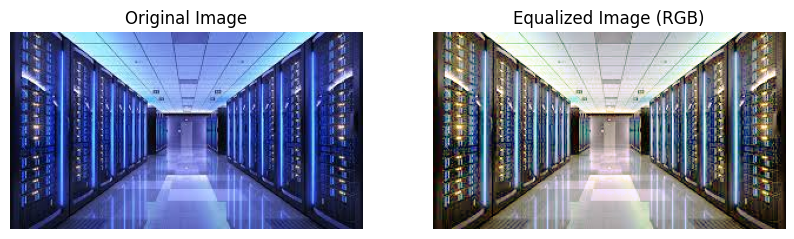

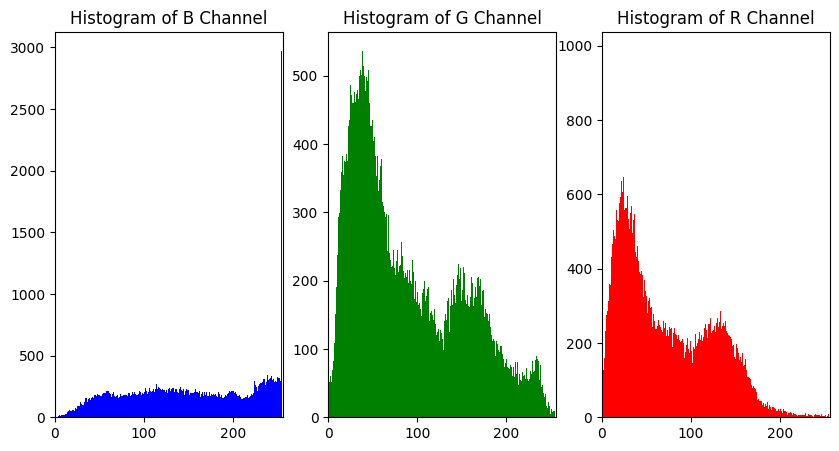

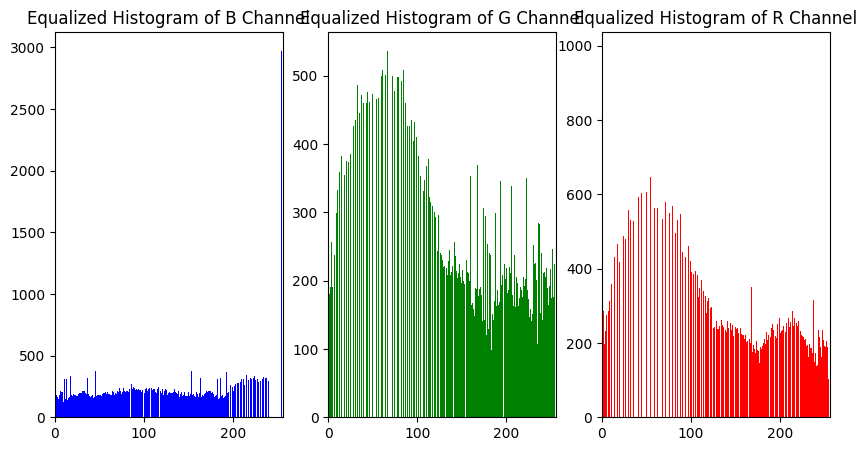

In [2]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
from io import BytesIO

url = 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiE-M8lmn9_5mQjzOKu6VaAJOtXCb1zga0a6gGCJ-2klU0-75qMvCNUkueSKq-BAU-_czb41g45wHaimnJF31BuO0mDTAMw15B60F9ysUQakc3y1pTytIR9tYVTtDhwG8TldkvCseyZLsw/s1600/hosting.jpg'

response = requests.get(url)
image_bytes = BytesIO(response.content)

image = cv2.imdecode(np.asarray(bytearray(image_bytes.read()), dtype=np.uint8), cv2.IMREAD_COLOR)

b, g, r = cv2.split(image)

b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)

equalized_image = cv2.merge([b_eq, g_eq, r_eq])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image (RGB)')
plt.axis('off')

plt.show()

color = ('b', 'g', 'r')
plt.figure(figsize=(10, 5))

for i, col in enumerate(color):
    plt.subplot(1, 3, i+1)
    plt.hist(image[:, :, i].ravel(), bins=256, color=col)
    plt.title(f'Histogram of {col.upper()} Channel')
    plt.xlim([0, 256])

plt.show()

plt.figure(figsize=(10, 5))

for i, col in enumerate(color):
    plt.subplot(1, 3, i+1)
    plt.hist(equalized_image[:, :, i].ravel(), bins=256, color=col)
    plt.title(f'Equalized Histogram of {col.upper()} Channel')
    plt.xlim([0, 256])

plt.show()
